# GX_05

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def two_f_system(field):
    """
        Takes an electrical field one focal length in front of the lens.
        Returns the electrical field one focal length behind the lens.
    """
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(field)))

# 1. Coherent vs Incoherent Imaging

Use the function `two_f_system` to propagate the electrical field through one lens.
In Fourier space multiply dark field aperture. 
The outer radius of the aperture is `20µm` and the inner radius is `3µm`.
The wavelength is `633nm` and the size of the Siemens star field is `200µm`.
The focal length is `631.9mm`


## 1 Propagate coherently through the optical system.
## 2 Propagate incoherently through the optical system.
## 3 Explain the differences in the results.
## 4 Why don't we need the focal length for the simulation? But why is it still important to know?
Recall what a lens really does to the electrical field. Is it only a *Fourier transform*?

In [27]:
target = np.load("usaf.npy")

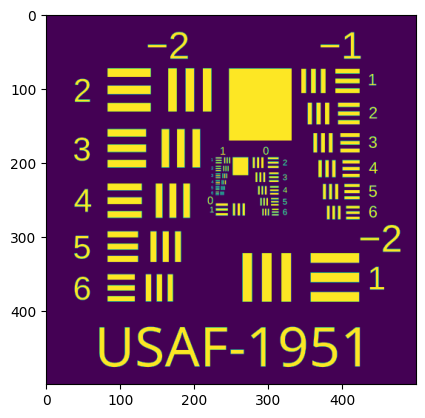

In [28]:
plt.imshow(target)

In [31]:
L = 200e-6
f = 631.9e-3
wvl = 633e-9
N = target.shape[0]
x = np.linspace(-L/2, L/2, target.shape[0], endpoint=False)
y = x
X, Y = np.meshgrid(x, y)

slit_width = 5e-6
slit_distance = 60e-6
slit = (np.abs(X-slit_distance / 2) < slit_width / 2) + (np.abs(X+slit_distance / 2) < slit_width / 2) + 0 * Y

aperture = ((X**2 + Y**2) < 20e-6**2) * 1.0 - 1.0 * ((X**2 + Y**2) < 3e-6**2)

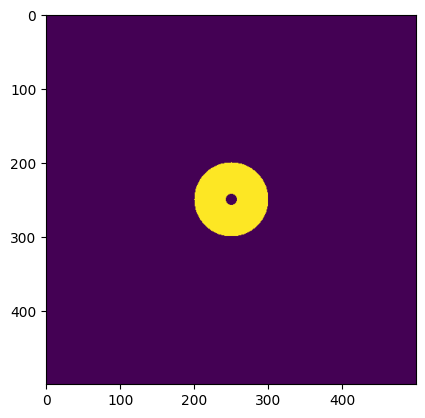

In [32]:
plt.imshow(aperture)

## 1

In [33]:
target_coherent = np.abs(two_f_system(two_f_system(target) * aperture))**2

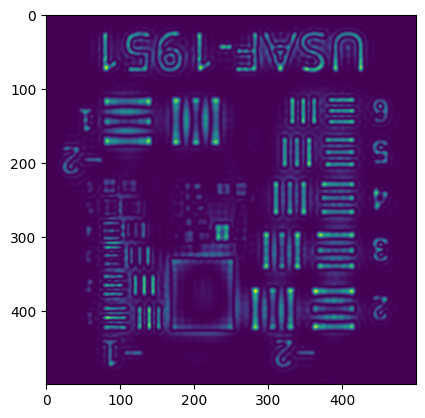

In [34]:
plt.imshow(target_coherent)

# 2

In [37]:
def incoherent(field, N=100):
    intensity = np.zeros((field.shape[0], field.shape[1]))

    for i in range(N):
        phase = np.exp(1j * 2 * np.pi * np.random.rand(field.shape[0], field.shape[1]))
        intensity += np.abs(two_f_system(two_f_system(target * phase) * aperture))**2
        
    return intensity

In [38]:
target_incoherent = incoherent(target)

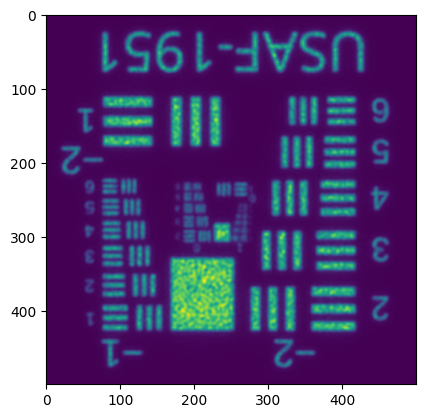

In [39]:
plt.imshow(target_incoherent)

# 3
The coherent case filters out the DC component whereas the incoherent one does not.
The incoherent one essentially convolves with the autoccorrelation of the aperture.

# 4
A lens is a scaled Fourier transform. But in this case we have chosen parameters which results in a magnification of M=1.

Hence Fourier space and real space have the same physical scaling

In [40]:
M = f * wvl * N / L
M

0.99998175